In [ ]:
#data interpreation
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#uploading and reading the datasets

data = pd.read_csv('advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
data.shape

(200, 4)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
data.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


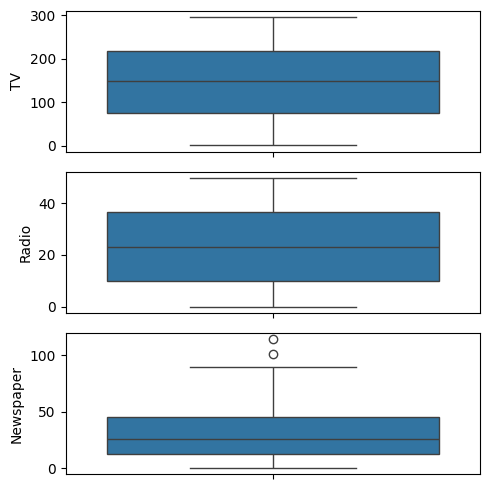

In [ ]:
fig, axes = plt.subplots(3, figsize=(5,5))
fig1 = sns.boxplot(data['TV'], ax=axes[0])
fig2 = sns.boxplot(data['Radio'], ax=axes[1])
fig3 = sns.boxplot(data['Newspaper'], ax=axes[2])
plt.tight_layout()
plt.show()

In [ ]:
#target = data['Sales']
#features = data.drop(['Sales'], axis=1)

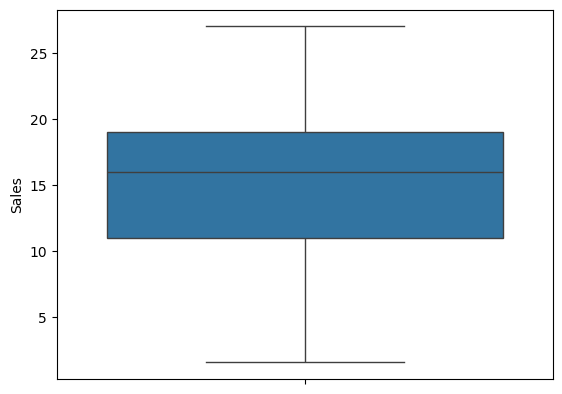

In [ ]:
sns.boxplot(data['Sales'])
plt.show()

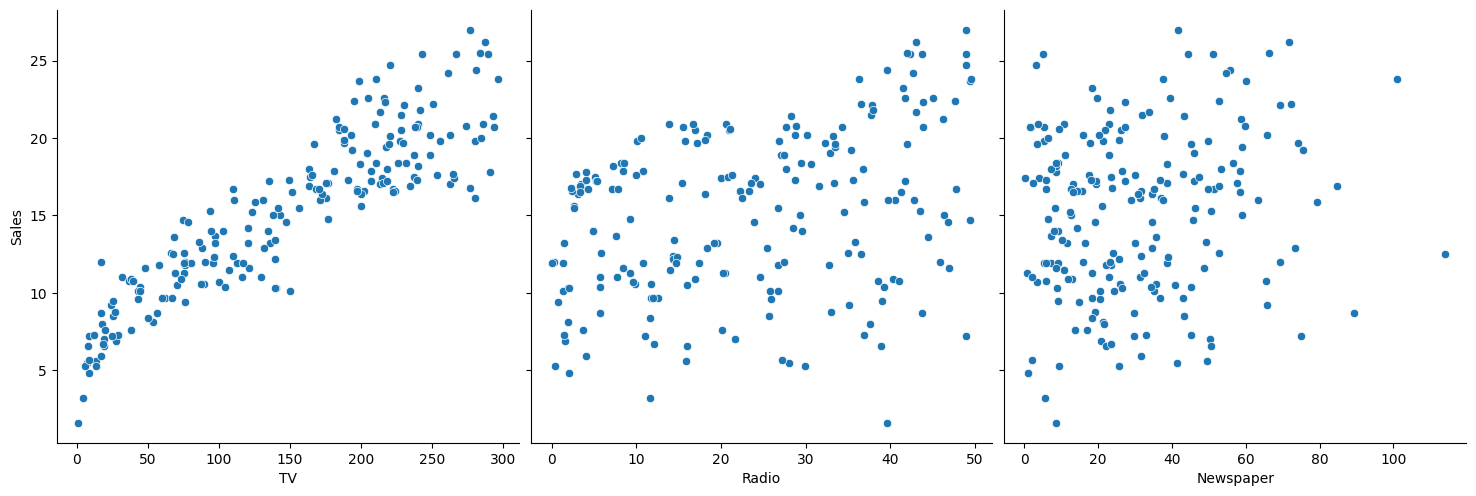

In [ ]:
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars=['Sales'], height=5,
             aspect=1, kind='scatter')
plt.show()

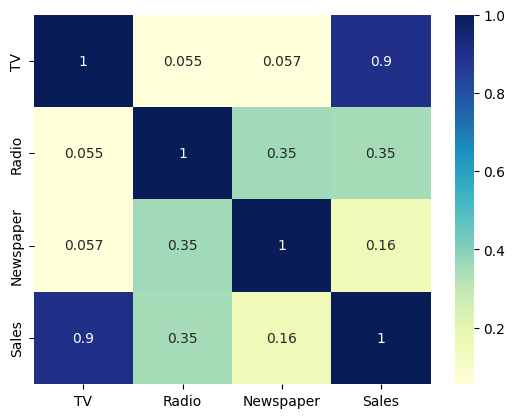

In [ ]:
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True)
plt.show()

In [ ]:
X = data['TV']
Y = data['Sales']

In [ ]:
#from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3)

In [ ]:
x_train.head()

,TV
56,7.3
128,220.3
156,93.9
62,239.3
36,266.9


In [ ]:
y_train.head()

,Sales
56,5.5
128,24.7
156,15.3
62,20.7
36,25.4


In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

LinearRegression()

In [ ]:
lm.coef_

array([[0.05675766]])

In [ ]:
lm.intercept_

array([6.89757491])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = lm.predict(x_test.values.reshape(-1,1))
y_pred
r2_score(y_test, y_pred)


0.8006222268237815

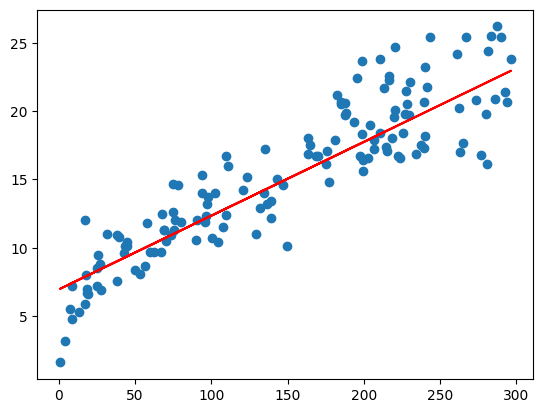

In [ ]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.948 + 0.054*x_train, 'r')
plt.show()

In [ ]:
#Model Evaluation

y_pred_train = lm.predict(x_train.values.reshape(-1,1))
# Convert y_pred_train to a 1-dimensional array
y_pred_train = y_pred_train.flatten()
# or y_pred_train = y_pred_train.reshape(-1)

res = y_train - y_pred_train # Now the subtraction should work
res

,Sales
56,-1.811906
128,5.298712
156,3.072881
62,0.220317
36,3.353805
...,...
115,1.439925
69,3.097364
121,-0.964619
107,-0.028468


<ipython-input-32-723b49e70e34>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


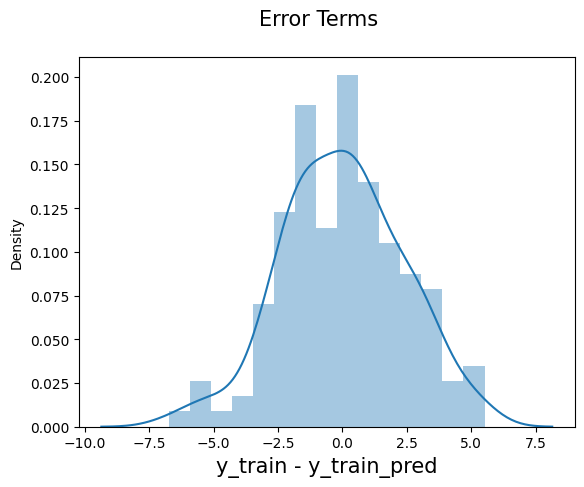

In [ ]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

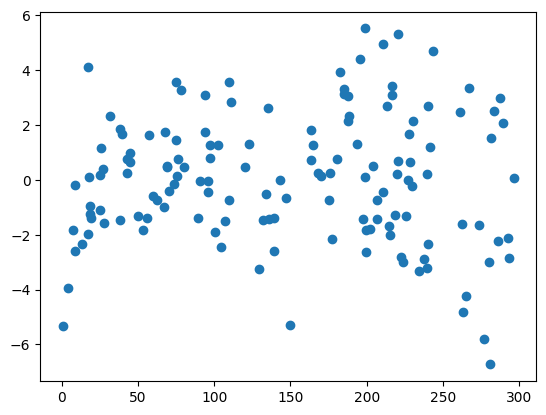

In [ ]:
plt.scatter(x_train,res)
plt.show()

In [ ]:
#add constant to x_test
import statsmodels.api as sm
x_test_new = sm.add_constant(x_test)
x_test_new.head()

,const,TV
120,1.0,141.3
152,1.0,197.6
135,1.0,48.3
93,1.0,250.9
185,1.0,205.0


In [ ]:
# Predict the y values corresponding to X_test_sm
y_pred = lm.predict(x_test_new[['TV']])
y_pred[:5]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[14.91743256],
       [18.11288893],
       [ 9.63896999],
       [21.13807231],
       [18.53289563]])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.1540548305831657

In [ ]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.8006222268237815

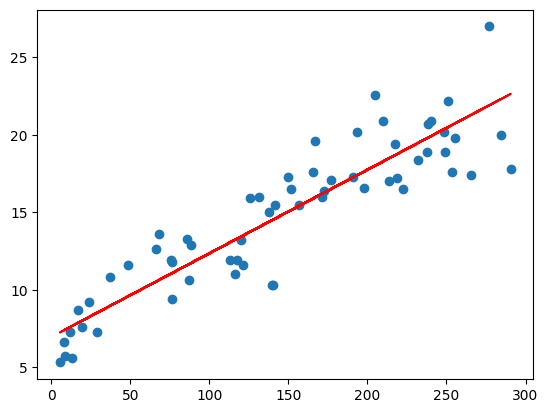

In [ ]:
plt.scatter(x_test, y_test)
plt.plot(x_test, 6.948 + 0.054 * x_test, 'r')
plt.show()